# **`Chapter 6: Regression`**

**Table of Content:**

- [Import Libraries](#Import_Libraries)
- [6.1. Introduction](#Introduction)
- [6.2. Least Squares Estimators of the Regression Parameters](#Least_Squares_Estimators_of_the_Regression_Parameters)
- [6.3. Statistical Inferences about the Regression Parameters](#Statistical_Inferences_about_the_Regression_Parameters)
  - [6.3.1. Inferences Concerning $B$](#Inferences_Concerning_B)
    - [6.3.1.1. Known Variance](#Known_Variance)
    - [6.3.1.2. Unknown Variance](#Unknown_Variance)
  - [6.3.2. Inferences Concerning $A$](#Inferences_Concerning_A)
    - [6.3.2.1. Unknown Variance](#Unknown_Variance_A)
  - [6.3.3. T-tests for Regression Parameters with statsmodels](#T-tests_for_Regression_Parameters_with_statsmodels)
  - [6.3.4. F-statistic for Overall Significance in Regression](#F-statistic_for_Overall_Significance_in_Regression)
- [6.4. Confidence Intervals Concerning Regression Models](#Confidence_Intervals_Concerning_Regression_Models)
  - [6.4.1. Confidence Interval for $B$](#Confidence_Interval_for_B)
    - [6.4.1.1. Known Variance](#Known_Variance_B)
    - [6.4.1.2. Unknown Variance](#Unknown_Variance_B)
  - [6.4.2. Confidence Interval for $A$](#Confidence_Interval_for_A)
    - [6.4.2.1. Unknown Variance](#Unknown_Variance_AA)
  - [6.4.3. Confidence Interval for $A + B x$](#Confidence_Interval_for_AB)
    - [6.4.3.1. Unknown Variance](#Unknown_Variance_ABB)
  - [6.4.4. Prediction Interval of a Future Response](#Prediction_Interval_of_a_Future_Response) 
- [6.5. Residuals](#Residuals)
  - [6.5.1. Regression Diagnostic](#Regression_Diagnostic)
  - [6.5.2. Multicolinearity](#Multicolinearity)
  

<a name='Import_Libraries'></a>

## **Import Libraries**

In [1]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import collections  as mc
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.integrate import quad
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, Latex

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a name='Introduction'></a>

## **6.1. Introduction:**

In many situations, there is a single response variable $Y$ , also called the dependent variable, which depends on the value of a set of input, also called independent variables $x_1, ... , x_n$. The simplest type of relationship between the dependent variable $Y$ and the
input variables $x_1, ... , x_n$ is a linear relationship. 

If regression coefficients are $β_0, β_1, ... , β_n$:

$Y = β_0 + β_1 x_1 +···+ β_r x_n + e$

where $e$, representing the random error, is assumed to be a random variable having mean 0.

$E[Y|x] = β_0 + β_1 x_1 +···+ β_r x_n$

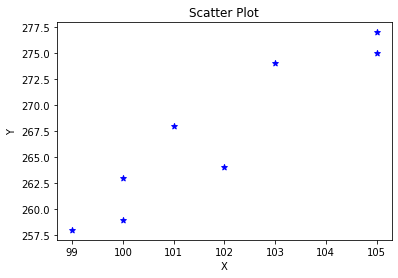

In [3]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]
  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.scatter(x, y, color ='blue', marker='*');

<a name='Least_Squares_Estimators_of_the_Regression_Parameters'></a>

## **6.2. Least Squares Estimators of the Regression Parameters:**

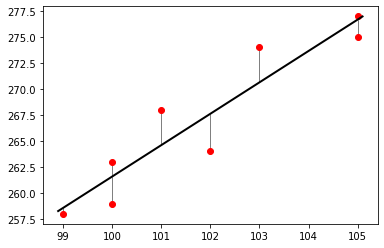

In [4]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

a = -40.10169491525426
b = 3.016949152542373
ax = plt.subplot()
ax.scatter(x, y, c='r', zorder=2)

xs = np.linspace(98.9,105.1)
ax.plot(xs, b*xs+a, c='k', lw=2)

# computing and plotting grey lines
lines = [[(i,j), (i,i*b+a)] for i,j in zip(x,y)]
lc = mc.LineCollection(lines, colors='grey', linewidths=1, zorder=1)
ax.add_collection(lc);

$Y_i = A + Bx_i + \varepsilon_i$

For estimating regression parameters, one way is to minimize the sum of the squared differences between the estimated responses and the actual response values (black vertical lines shown above is our errors which we want to minimize).

$SSE =  \sum_{i=1}^n (y_i - \widehat{A} -  \widehat{B}\ x_i)^2 $ 

$\\ $

To determine these estimators, we differentiate Q first with respect to A and then to B as follows:

$\frac{\partial SSE}{\partial \widehat{A}} = 0 \rightarrow -2\ \sum_{i=1}^n (y_i - \widehat{A} -  \widehat{B}\ x_i) = 0$

$\frac{\partial SSE}{\partial \widehat{B}} = 0 \rightarrow -2\ \sum_{i=1}^n x_i\ (y_i - \widehat{A} -  \widehat{B}\ x_i) = 0$

$\\ $

The results are:

$\widehat{B} = b = \frac{S_{xy}}{S_{xx}}$

$\widehat{A} = a = \overline{y} - B\ \overline{x}$

$S_{xx} = \sum_{i=1}^n (x_i - \overline{x})^2 = \sum_{i=1}^n x_i^2 - n \overline{x}^2 = \sum_{i=1}^n (x_i - \overline{x})x_i$

$S_{yy} = \sum_{i=1}^n (y_i - \overline{y})^2 = \sum_{i=1}^n y_i^2 - n \overline{y}^2 = \sum_{i=1}^n (y_i - \overline{y})y_i$

$S_{xy} = \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) = \sum_{i=1}^n x_i y_i - n \overline{x}\ \overline{y} = \sum_{i=1}^n (x_i - \overline{x})y_i$

In [5]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

xx = []
for i in x:
  xx.append((i - np.mean(x))**2)
S_xx = np.sum(xx)

yy = []
for i in y:
  yy.append((i - np.mean(y))**2)
S_yy = np.sum(yy)

xy = []
for i in range(len(x)):
  xy.append((x[i] - np.mean(x))* (y[i] - np.mean(y)))
S_xy = np.sum(xy)

B_hat = (S_xy) / (S_xx)
A_hat = np.mean(y) - B_hat *  np.mean(x)
print(f'A_hat : {A_hat}, B_hat : {B_hat}')

A_hat : -40.10169491525426, B_hat : 3.016949152542373


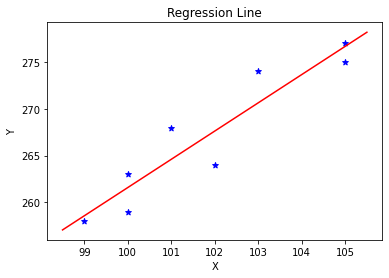

In [42]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]
  
s = np.arange(np.min(x)-0.5, np.max(x)+0.5, 0.001)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line')
plt.scatter(x, y, color ='blue', marker='*')
plt.plot(s, A_hat + B_hat*s, color ='red');

The other way is to use the statsmodel library. It will automatically take care of all the calculations. 

In [7]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

x = sm.add_constant(x)
model = sm.OLS(y, x)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     42.07
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           0.000638
Time:                        10:23:33   Log-Likelihood:                -18.507
No. Observations:                   8   AIC:                             41.01
Df Residuals:                       6   BIC:                             41.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.1017     47.395     -0.846      0.4

You can also use the sklearn library.

In [8]:
x = np.array([100,102,103,101,105,100,99,105]).reshape(-1, 1)
y = np.array([259,264,274,268,277,263,258,275]).reshape(-1, 1)

regr = LinearRegression()
regr.fit(x, y)
print(f'intercept: {float(regr.intercept_)}, coefficient: {float(regr.coef_)}')

intercept: -40.10169491525426, coefficient: 3.0169491525423733


**Sum of Squares Error (SSE):** The sum of squared differences between predicted data points $\widehat{y_i}$ and observed data points $y_i$. 

$SSE = \sum_{i=1}^n (\widehat{y_i} - y_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}} = S_{yy} - b\ S_{xy} = S_{yy} - b^2\ S_{xx}$

**Sum of Squares Regression (SSR):** The sum of squared differences between predicted data points $\widehat{y_i}$ and the mean of the response variable $\overline{y_i}$

$SSR = \sum_{i=1}^n (\widehat{y_i} - \overline{y_i})^2 = \frac{S_{xy}^2}{S_{xx}}$

**Sum of Squares Total (SST):** The sum of squared differences between individual data points $y_i$ and the mean of the response variable $\overline{y_i}$.

$SST = \sum_{i=1}^n (y_i - \overline{y_i})^2$

$\\ $

The following relationship exists between these three measures: $SST = SSR + SSE$

$\\ $

**R-Squared:**

$R^2$ sometimes referred to as the coefficient of determination, is a measure of how well a linear regression model fits a dataset. It represents the proportion of the variance in the response variable that can be explained by the predictor variable. The value for $R^2$ can range from 0 to 1. 

A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

$R^2 = \frac{SSR}{SST} = \frac{S_{xy}^2}{S_{xx}S_{yy}}$

$\\ $

**Adjusted R-Squared:**

Adjusted $R^2$ is a corrected goodness-of-fit (model accuracy) measure for linear models. $R^2$ tends to optimistically estimate the fit of the linear regression. It always increases as the number of effects are included in the model. Adjusted $R^2$ attempts to correct for this overestimation. Adjusted $R^2$ might decrease if a specific effect does not improve the model. In other words, the adjusted $R^2$ will penalize you for adding independent variables that do not fit the model. Adjusted $R^2$ is always less than or equal to $R^2$.

n: Number of points in your data set.

k: Number of independent variables in the model, excluding the constant

Adjusted $R^2 = 1-\frac{(1-R^2)\ x\ (n-1)}{(n-k-1)}$

<a name='Statistical_Inferences_about_the_Regression_Parameters'></a>

## **6.3. Statistical Inferences about the Regression Parameters:**

<a name='Inferences_Concerning_B'></a>

### **6.3.1. Inferences Concerning $B$:**

<a name='Known_Variance'></a>

#### **6.3.1.1. Known Variance:**

**A. Two Tailed Test:**

$H_0:\ B = B_0$

$H_1:\ B  \neq B_0$

$\\ $

Testing statistics: 

$Z_0  \equiv \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $-\ Z_{\frac{\alpha}{2}}\ <\ Z_0 = \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}\ <\ Z_{\frac{\alpha}{2}}$

2. P_value $ = 2 \times P(Z \geq |Z_0|) > \alpha$

**B. One-sided tests:**

**Right-tailed test:**

$H_0:\ B =  B_0\ \quad or \quad H_0:\ \mu  \leq B_0$

$H_1:\ B  > B_0$

$\\ $

Testing statistics: 

$Z_0  \equiv \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $ -\infty <\ Z_0 = \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}\ <\ Z_{\alpha} $

2. P_value $ = P(Z \geq Z_0) > \alpha$

**Left-tailed test:**

$H_0:\ B =  B_0 \quad or \quad H_0:\ B  \geq B_0$

$H_1:\ B < B_0$

$\\ $

Testing statistics: 

$Z_0  \equiv \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $-\ Z_{\alpha}\ <\ Z_0 = \frac{b\ -\ B_0}{\frac{\sigma}{\sqrt{S_{xx}}}}\ <\ \infty $

2. P_value $ = P(Z \leq Z_0) > \alpha$

In [9]:
class test_coefficient_known_variance:
  """
  Parameters
  ----------
  null_b : B0
  b : estimate of B
  population_sd : known standrad deviation of the population
  alpha : significance level
  type_t : 'two_tailed', 'right_tailed', 'left_tailed'
  S_xx
  S_xy
  data_x : optional
  data_y : optional
  """
  def __init__(self, null_b, population_sd, type_t, alpha, S_xx = 0., S_xy = 0., data_x=None, data_y=None):
    self.null_b = null_b
    self.population_sd = population_sd
    self.type_t = type_t
    self.alpha = alpha
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)

    test_coefficient_known_variance.__test(self)
  
  def __test(self):
    b = self.S_xy / self.S_xx
    test_statistic = (b - self.null_b) / (self.population_sd - np.sqrt(self.S_xx))
    print('test_statistic:', test_statistic, '\n')

    if self.type_t == 'two_tailed':
      p_value = 2*(1-norm.cdf(abs(test_statistic)))
      print('P_value:', p_value, '\n')
    elif self.type_t == 'left_tailed':
      p_value = (norm.cdf(test_statistic))
      print('P_value:', p_value, '\n')
    else:
       p_value = (1-norm.cdf(test_statistic))
       print('P_value:', p_value, '\n')

    if p_value < self.alpha:
      print(f'Since p_value < {self.alpha}, reject null hypothesis.')
    else:
      print(f'Since p_value > {self.alpha}, the null hypothesis cannot be rejected.')

In [10]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

test_coefficient_known_variance(null_b = 0, population_sd = 2, type_t = 'two_tailed', alpha = 0.05, data_x = x, data_y = y);

test_statistic: -0.7408139430728671 

P_value: 0.45880625987978396 

Since p_value > 0.05, the null hypothesis cannot be rejected.


<a name='Unknown_Variance'></a>

#### **6.3.1.2. Unknown Variance:**

**A. Two Tailed Test:**

$H_0:\ B = B_0$

$H_1:\ B  \neq B_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $-\ t_{\frac{\alpha}{2},n-2}\ <\ t_0 = \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}} <\ t_{\frac{\alpha}{2},n-2}$

2. P_value $ = 2 \times P(t_{n-2} \geq |t_0|) > \alpha$

**B. One-sided tests:**

**Right-tailed test:**

$H_0:\ B = B_0\ \quad or \quad H_0:\ B \leq B_0$

$H_1:\ B > B_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $ -\infty <\ t_0  = \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}}\ <\ t_{\alpha, n-2} $

2. P_value $ = P(t_{n-2} \geq t_0) > \alpha$

**Left-tailed test:**

$H_0:\ B = B_0 \quad or \quad H_0:\ B \geq B_0$

$H_1:\ B < B_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $ -\ t_{\alpha, n-2} <\ t_0  = \frac{b\ -\ B_0}{\frac{S_{y|x}}{\sqrt{S_{xx}}}}\ <\  \infty$

2. P_value $ = P(t_{n-2} \leq t_0) > \alpha$

In [11]:
class test_coefficient_unknown_variance:
  """
  Parameters
  ----------
  null_b : B0
  b : estimate of B
  alpha : significance level
  type_t : 'two_tailed', 'right_tailed', 'left_tailed'
  S_xx
  S_xy
  S_yy
  data_x : optional
  data_y : optional
  """
  def __init__(self, null_b, alpha, type_t, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.null_b = null_b
    self.type_t = type_t
    self.alpha = alpha
    self.n = n
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None
    
    test_coefficient_unknown_variance.__test(self)    

  def __test(self):
    b = self.S_xy / self.S_xx
    self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
    test_statistic = (b - self.null_b) / (self.Syx / np.sqrt(self.S_xx))
    print('test_statistic:', test_statistic, '\n')
    
    if self.type_t == 'two_tailed':
      p_value = 2*(1-t.cdf(abs(test_statistic), df=self.n-2))
      print('P_value:', p_value, '\n')
    elif self.type_t == 'left_tailed':
      p_value = (t.cdf(test_statistic, df=self.n-2))
      print('P_value:', p_value, '\n')
    else:
       p_value = (1-t.cdf(test_statistic, df=self.n-2))
       print('P_value:', p_value, '\n')

    if p_value < self.alpha:
      print(f'Since p_value < {self.alpha}, reject null hypothesis.')
    else:
      print(f'Since p_value > {self.alpha}, the null hypothesis cannot be rejected.')

In [12]:
x = [45,50,55,60,65,70,75]
y = [24.2,25,23.3,22,21.5,20.6,19.8]

test_coefficient_unknown_variance(null_b = 0, type_t = 'two_tailed', alpha = 0.05, data_x = x, data_y = y);

test_statistic: -8.13847644694359 

P_value: 0.0004547603641058551 

Since p_value < 0.05, reject null hypothesis.


In [13]:
test_coefficient_unknown_variance(null_b = 0, type_t = 'two_tailed', alpha = 0.05, n=22, S_xx = 5, S_xy = 3, S_yy = 7);

test_statistic: 2.631174057921087 

P_value: 0.016008148639689912 

Since p_value < 0.05, reject null hypothesis.


<a name='Inferences_Concerning_A'></a>

### **6.3.2. Inferences Concerning $A$:**

<a name='Unknown_Variance_A'></a>

#### **6.3.2.1. Unknown Variance:**

**A. Two Tailed Test:**

$H_0:\ A = A_0$

$H_1:\ A  \neq A_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $-\ t_{\frac{\alpha}{2},n-2}\ <\ t_0 = \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}} <\ t_{\frac{\alpha}{2},n-2}$

2. P_value $ = 2 \times P(t_{n-2} \geq |t_0|) > \alpha$

**B. One-sided tests:**

**Right-tailed test:**

$H_0:\ A = A_0$

$H_1:\ A  \neq A_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $ -\infty <\ t_0  = \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}\ <\ t_{\alpha, n-2} $

2. P_value $ = P(t_{n-2} \geq t_0) > \alpha$

**Left-tailed test:**

$H_0:\ A = A_0$

$H_1:\ A  \neq A_0$

$\\ $

Testing statistics: 

$t_0  \equiv \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}$

$S_{y|x} = \sqrt{MSE} = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{(S_{yy}- \frac{S_{xy}^2}{S_{xx}})}{n-2}}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. $ -\ t_{\alpha, n-2} <\ t_0  = \frac{a\ -\ A_0}{S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}\ <\  \infty$

2. P_value $ = P(t_{n-2} \leq t_0) > \alpha$

In [14]:
class test_intercept_unknown_variance:
  """
  Parameters
  ----------
  null_a : A0
  a : estimate of A
  alpha : significance level
  type_t : 'two_tailed', 'right_tailed', 'left_tailed'
  S_xx
  S_xy
  S_yy
  data_x : optional
  data_y : optional
  """
  def __init__(self, null_a, alpha, type_t, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.null_a = null_a
    self.type_t = type_t
    self.alpha = alpha
    self.n = n
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None
    
    test_intercept_unknown_variance.__test(self)    

  def __test(self):
    b = self.S_xy / self.S_xx
    a = np.mean(self.data_y) - b * np.mean(self.data_x)
    self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
    test_statistic = (a - self.null_a) / (self.Syx * np.sqrt((1/self.n) + ((np.mean(self.data_x)**2) / self.S_xx)))
    print('test_statistic:', test_statistic, '\n')
    
    if self.type_t == 'two_tailed':
      p_value = 2*(1-t.cdf(abs(test_statistic), df=self.n-2))
      print('P_value:', p_value, '\n')
    elif self.type_t == 'left_tailed':
      p_value = (t.cdf(test_statistic, df=self.n-2))
      print('P_value:', p_value, '\n')
    else:
       p_value = (1-t.cdf(test_statistic, df=self.n-2))
       print('P_value:', p_value, '\n')

    if p_value < self.alpha:
      print(f'Since p_value < {self.alpha}, reject null hypothesis.')
    else:
      print(f'Since p_value > {self.alpha}, the null hypothesis cannot be rejected.')

In [15]:
x = [45,50,55,60,65,70,75]
y = [24.2,25,23.3,22,21.5,20.6,19.8]

test_intercept_unknown_variance(null_a = 0, type_t = 'two_tailed', alpha = 0.05, data_x = x, data_y = y);

test_statistic: 25.6123251907897 

P_value: 1.6943048344320033e-06 

Since p_value < 0.05, reject null hypothesis.


<a name='T-tests_for_Regression_Parameters_with_statsmodels'></a>

### **6.3.3. T-tests for Regression Parameters with statsmodels:**

In [16]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

x = sm.add_constant(x)
model = sm.OLS(y, x)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     42.07
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           0.000638
Time:                        10:23:34   Log-Likelihood:                -18.507
No. Observations:                   8   AIC:                             41.01
Df Residuals:                       6   BIC:                             41.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.1017     47.395     -0.846      0.4

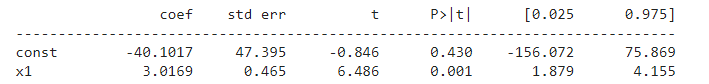

This is what you should look for if you want to do a hypothesis test in statsmodels. Column "t" gives us the test-statistics, Column "P>|t|" gives us the p-value. Columns "0.025" and "0.975" gives us the confidence interval for regression parameters. It's exactly the results that we got when using previously written classes.

In [17]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

test_intercept_unknown_variance(null_a = 0, type_t = 'two_tailed', alpha = 0.05, data_x = x, data_y = y);

test_statistic: -0.8461239472569388 

P_value: 0.4299305678887875 

Since p_value > 0.05, the null hypothesis cannot be rejected.


In [18]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

test_coefficient_unknown_variance(null_b = 0, type_t = 'two_tailed', alpha = 0.05, data_x = x, data_y = y);

test_statistic: 6.486393472746325 

P_value: 0.0006383332228794281 

Since p_value < 0.05, reject null hypothesis.


If we have more than one $X$, the written classes need a little tweak, therefore it is better to use the statsmodels library. One difference in this situation is the degree of freedom in the p-value for t-tests. $t_{n-2}$ is correct when we have 1 independent variable but if we have $k$ independent variables, the degree of freedom in the p-value for t-tests is $n-k-1$.

In [19]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
Y = df['Stock_Index_Price']
X = df[['Interest_Rate','Unemployment_Rate']]

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.04e-11
Time:                        10:23:34   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

<a name='F-statistic_for_Overall_Significance_in_Regression'></a>

### **6.3.4. F-statistic for Overall Significance in Regression:**

The F-statistic provides us with a way for globally testing if ANY of the independent variables $X_1, X_2, X_3, ...$ is related to the outcome $Y$.

$H_0$ : The model with no predictor variables (also known as an intercept-only model) fits the data as well as your regression model.

$B_1 = B_2 = ... = B_n = 0$

$H_1$ : Regression model fits the data better than the intercept-only model.

not all $B_1 = B_2 = ... = B_n = 0$

$\\ $

Testing statistics: 

$F_0 \equiv \frac{MSR}{MSE}$

$MSR = \frac{SSR}{1} \qquad MSE = \frac{SSE}{n-2}$

$\\ $

Significance level = $\alpha$

We accept $H_0$ if:

1. P_value $ = P(F_{1,n-2} \geq F_0) > \alpha$

In [20]:
class f_regression:
  """
  Parameters
  ----------
  null_v : v0
  n1 : optional, number of data1 members
  n2 : optional, number of data2 members
  S2X : sample1 variance
  S2Y : sample2 variance
  alpha : significance level
  type_t : 'two_tailed', 'right_tailed', 'left_tailed'
  data1 : optional, if you do not know the S2X, just pass the data
  data2 : optional, if you do not know the S2Y, just pass the data
  """
  def __init__(self, alpha, n = 0., S_xx = 0., S_yy = 0., S_xy = 0., data_x=None, data_y=None):
    self.S_yy = S_yy
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.n = n
    self.alpha = alpha
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)

    f_regression.__test(self)
  
  def __test(self):
    SSR = (self.S_xy**2) / self.S_xx
    SSE = self.S_yy - ((self.S_xy**2) / self.S_xx)
    test_statistic = (SSR/1) / (SSE/(self.n-2))
    print('test_statistic:', test_statistic, '\n')
    
    p_value = 1-stats.f.cdf(test_statistic, 1, self.n-2)
    print('P_value:', p_value, '\n')

    if p_value < self.alpha:
      print(f'Since p_value < {self.alpha}, reject null hypothesis')
    else:
      print(f'Since p_value > {self.alpha}, the null hypothesis cannot be rejected.')

In [21]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

f_regression(alpha = 0.05, data_x = x, data_y = y);

test_statistic: 42.07330028328612 

P_value: 0.0006383332228794281 

Since p_value < 0.05, reject null hypothesis


This test can also be done by statsmodels library. It can also do the test when we have more than one independent variable. The previously written need a little tweak for more than one independent variable (just degree of freedom differs.)

In [22]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

x = sm.add_constant(x)
model = sm.OLS(y, x)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     42.07
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           0.000638
Time:                        10:23:34   Log-Likelihood:                -18.507
No. Observations:                   8   AIC:                             41.01
Df Residuals:                       6   BIC:                             41.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.1017     47.395     -0.846      0.4

In [23]:
print(f'f-statistic: {reg.fvalue}, p-value: {reg.f_pvalue}')

f-statistic: 42.07330028328628, p-value: 0.0006383332228793835


<a name='Confidence_Intervals_Concerning_Regression_Models'></a>

## **6.4. Confidence Intervals Concerning Regression Models:**

<a name='Confidence_Interval_for_B'></a>

### **6.4.1. Confidence Interval for $B$:**

<a name='Known_Variance_B'></a>

#### **6.4.1.1. Known Variance:**

**A. Two-sided Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(b\ -\ Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{S_{xx}}} \leq B \leq b\ +\ Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{S_{xx}}}) = 1-\alpha $

$\\ $

Therefore, the $1-\alpha$ confidence interval for $B$ is:

$[b\ -\ Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{S_{xx}}}\ ,\ b\ +\ Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{S_{xx}}}]$

**B. One-sided Lower Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(-\infty\ \leq\ B\ \leq\ b\ +\ Z_{\alpha} \frac{\sigma}{\sqrt{S_{xx}}}) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[-\infty,\ b\ +\ Z_{\alpha} \frac{\sigma}{\sqrt{S_{xx}}}]$

**C. One-sided Upper Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(b\ -\ Z_{\alpha} \frac{\sigma}{\sqrt{S_{xx}}}\ \leq\ B\ \leq\ \infty) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[b\ -\ Z_{\alpha} \frac{\sigma}{\sqrt{S_{xx}}},\ \infty]$

In [24]:
class confidence_interval_for_b_known_variance:
  """
  Parameters
  ----------
  population_sd : known standrad deviation of the population
  c_level : % confidence level
  type_t : 'two_sided_confidence', 'lower_confidence', 'upper_confidence'
  S_xx
  S_xy
  data_x : optional
  data_y : optional
  """
  def __init__(self, population_sd, c_level, type_c, S_xx = 0., S_xy = 0., data_x=None, data_y=None):
    self.population_sd = population_sd
    self.type_c = type_c
    self.c_level = c_level
    self.data_x = data_x
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None

    confidence_interval_for_b_known_variance.__test(self)
  
  def __test(self):
    if self.type_c == 'two_sided_confidence':
      b = self.S_xy / self.S_xx
      c_u = b + (-norm.ppf((1-self.c_level)/2)) * (self.population_sd/np.sqrt(self.S_xx))
      c_l = b - (-norm.ppf((1-self.c_level)/2)) * (self.population_sd/np.sqrt(self.S_xx))
      display(Latex(f'${c_l} \leq B \leq {c_u}$'))
    elif self.type_c == 'lower_confidence':
      b = self.S_xy / self.S_xx
      c_u = b + (-norm.ppf(1-self.c_level)) * (self.population_sd/np.sqrt(self.S_xx))
      display(Latex(f'$B \leq {c_u}$'))
    elif self.type_c == 'upper_confidence':
      b = self.S_xy / self.S_xx
      c_l = b - (-norm.ppf(1-self.c_level)) * (self.population_sd/np.sqrt(self.S_xx))
      display(Latex(f'${c_l} \leq B$'))

In [25]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

confidence_interval_for_b_known_variance(population_sd = 1, c_level = 0.95, type_c = 'two_sided_confidence', data_x=x, data_y=y);

<IPython.core.display.Latex object>

<a name='Unknown_Variance_B'></a>

#### **6.4.1.2. Unknown Variance**

**A. Two-sided Confidence Interval:**

Significance level = $\alpha$

$P(b -\ t_{\frac{\alpha}{2},n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}\ <\ B <\ b +\ t_{\frac{\alpha}{2},n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[b -\ t_{\frac{\alpha}{2},n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}\ ,\ b +\ t_{\frac{\alpha}{2},n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}]$

**B. One-sided Lower Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(-\infty\ \leq\ B\ \leq\ b +\ t_{\alpha,n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[-\infty,\ b +\ t_{\alpha,n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}]$

**C. One-sided Upper Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(b -\ t_{\alpha,n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}}\ \leq\ B\ \leq\ \infty) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[b -\ t_{\alpha,n-2} \frac{S_{y|x}}{\sqrt{S_{xx}}},\ \infty]$

In [26]:
class confidence_interval_for_b_unknown_variance:
  """
  Parameters
  ----------
  c_level : % confidence level
  type_t : 'two_sided_confidence', 'lower_confidence', 'upper_confidence'
  Sample_std : optional, std of the sample
  Sample_mean : optional, mean of the sample
  data : optional, if you do not know the Sample_mean and n, just pass the data
  """
  def __init__(self, c_level, type_c, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.type_c = type_c
    self.c_level = c_level
    self.n = n
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None

    confidence_interval_for_b_unknown_variance.__test(self)
  
  def __test(self):
    if self.type_c == 'two_sided_confidence':
      b = self.S_xy / self.S_xx
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = b + (t.isf((1-self.c_level)/2, self.n-2)) * (self.Syx/np.sqrt(self.S_xx))
      c_l = b - (t.isf((1-self.c_level)/2, self.n-2)) * (self.Syx/np.sqrt(self.S_xx))
      display(Latex(f'${c_l} \leq B \leq {c_u}$'))
    elif self.type_c == 'lower_confidence':
      b = self.S_xy / self.S_xx
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = b + (t.isf(1-self.c_level, self.n-2)) * (self.Syx/np.sqrt(self.S_xx))
      display(Latex(f'$B \leq {c_u}$'))
    elif self.type_c == 'upper_confidence':
      b = self.S_xy / self.S_xx
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_l = b - (t.isf(1-self.c_level, self.n-2)) * (self.Syx/np.sqrt(self.S_xx))
      display(Latex(f'${c_l} \leq B$'))

In [27]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

confidence_interval_for_b_unknown_variance(c_level = 0.95, type_c = 'two_sided_confidence', data_x=x, data_y=y);

<IPython.core.display.Latex object>

<a name='Confidence_Interval_for_A'></a>

### **6.4.2. Confidence Interval for $A$:**

<a name='Unknown_Variance_AA'></a>

#### **6.4.2.1. Unknown Variance:**

**A. Two-sided Confidence Interval:**

Significance level = $\alpha$

$P(a -\ t_{\frac{\alpha}{2},n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}\ <\ A <\ a +\ t_{\frac{\alpha}{2},n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a -\ t_{\frac{\alpha}{2},n-2} {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}\ ,\ a +\ t_{\frac{\alpha}{2},n-2} {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}]$

**B. One-sided Lower Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(-\infty\ \leq\ A\ \leq\ a +\ t_{\alpha,n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[-\infty,\ a +\ t_{\alpha,n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}]$

**C. One-sided Upper Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(a -\ t_{\alpha,n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}}\ \leq\ B\ \leq\ \infty) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a -\ t_{\alpha,n-2}\ {S_{y|x} \sqrt{\frac{1}{n} + \frac{\overline{x}^2}{S_{xx}}}},\ \infty]$

In [28]:
class confidence_interval_for_a_unknown_variance:
  """
  Parameters
  ----------
  c_level : % confidence level
  type_t : 'two_sided_confidence', 'lower_confidence', 'upper_confidence'
  S_xx : optional
  S_yy : optional
  S_xy : optional
  data : optional
  """
  def __init__(self, c_level, type_c, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.type_c = type_c
    self.c_level = c_level
    self.n = n
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None

    confidence_interval_for_a_unknown_variance.__test(self)
  
  def __test(self):
    if self.type_c == 'two_sided_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + ((np.mean(self.data_x)**2) / self.S_xx))
      c_l = a - (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + ((np.mean(self.data_x)**2) / self.S_xx))
      display(Latex(f'${c_l} \leq A \leq {c_u}$'))
    elif self.type_c == 'lower_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + (t.isf((1-self.c_level), self.n-2)) * self.Syx * np.sqrt((1/self.n) + ((np.mean(self.data_x)**2) / self.S_xx))
      display(Latex(f'$A \leq {c_u}$'))
    elif self.type_c == 'upper_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_l = a - (t.isf((1-self.c_level), self.n-2)) * self.Syx * np.sqrt((1/self.n) + ((np.mean(self.data_x)**2) / self.S_xx))
      display(Latex(f'${c_l} \leq A$'))

In [29]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

confidence_interval_for_a_unknown_variance(c_level = 0.95, type_c = 'two_sided_confidence', data_x=x, data_y=y);

<IPython.core.display.Latex object>

<a name='Confidence_Interval_for_AB'></a>

### **6.4.3. Confidence Interval for $A + B x$:**

<a name='Unknown_Variance_ABB'></a>

#### **6.4.3.1. Unknown Variance:**

**A. Two-sided Confidence Interval:**

Significance level = $\alpha$

$P(a + bx^* - t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ <\ A + Bx<\ a + bx^* + t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a + bx^* - t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ,\ a + bx^* + t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}]$

**B. One-sided Lower Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(-\infty\ \leq\ A + Bx<\ a + bx^* + t_{\alpha,n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[-\infty\ ,\ a + bx^* + t_{\alpha,n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}]$

**C. One-sided Upper Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(a + bx^* - t_{\alpha,n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ \leq\ B\ \leq\ \infty) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a + bx^* - t_{\alpha,n-2}{S_{y|x} \sqrt{\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ,\ \infty]$

In [30]:
class confidence_interval_for_ab_unknown_variance:
  """
  Parameters
  ----------
  c_level : % confidence level
  type_t : 'two_sided_confidence', 'lower_confidence', 'upper_confidence'
  S_xx : optional
  S_yy : optional
  S_xy : optional
  data : optional
  """
  def __init__(self, c_level, type_c, x_star, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.type_c = type_c
    self.c_level = c_level
    self.n = n
    self.x_star = x_star
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None

    confidence_interval_for_ab_unknown_variance.__test(self)
  
  def __test(self):
    if self.type_c == 'two_sided_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + b*self.x_star + (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      c_l = a + b*self.x_star - (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'${c_l} \leq A + Bx \leq {c_u}$'))
    elif self.type_c == 'lower_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + b*self.x_star + (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'$A + Bx \leq {c_u}$'))
    elif self.type_c == 'upper_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_l = a + b*self.x_star - (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt((1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'${c_l} \leq A + Bx$'))

In [31]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

confidence_interval_for_ab_unknown_variance(x_star = 107, c_level = 0.95, type_c = 'two_sided_confidence', data_x=x, data_y=y);

<IPython.core.display.Latex object>

If $x^*$ is colser to $\overline{x}$, the confidence interval is smaller. This is shown in the next plot.

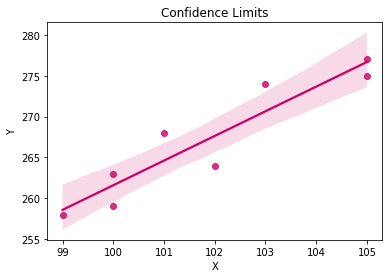

In [32]:
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Confidence Limits')
sns.regplot(x, y, ci = 95, order = 1, marker = 'o', color ='#cc0066');

<a name='Prediction_Interval_of_a_Future_Response'></a>

### **6.4.4. Prediction Interval of a Future Response:**

**A. Two-sided Confidence Interval:**

Significance level = $\alpha$

$P(a + bx^* - t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ <\ A + Bx<\ a + bx^* + t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a + bx^* - t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ,\ a + bx^* + t_{\frac{\alpha}{2},n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}]$

**B. One-sided Lower Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(-\infty\ \leq\ A + Bx<\ a + bx^* + t_{\alpha,n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[-\infty\ ,\ a + bx^* + t_{\alpha,n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}]$

**C. One-sided Upper Confidence Interval:**

Significance level = $\alpha$

$\\ $

$P(a + bx^* - t_{\alpha,n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ \leq\ B\ \leq\ \infty) = 1-\alpha$

$\\ $

Therefore, the $1-\alpha$ confidence interval for for the mean of a normal population is:

$[a + bx^* - t_{\alpha,n-2}{S_{y|x} \sqrt{1+\frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}\ ,\ \infty]$

In [33]:
class prediction_interval:
  """
  Parameters
  ----------
  c_level : % confidence level
  type_t : 'two_sided_confidence', 'lower_confidence', 'upper_confidence'
  S_xx : optional
  S_yy : optional
  S_xy : optional
  data : optional
  """
  def __init__(self, c_level, type_c, x_star, n = 0., S_xx = 0., S_xy = 0., S_yy = 0., data_x=None, data_y=None):
    self.type_c = type_c
    self.c_level = c_level
    self.n = n
    self.x_star = x_star
    self.S_xx = S_xx
    self.S_xy = S_xy
    self.S_yy = S_yy
    self.data_x = data_x
    self.data_y = data_y
    if data_x is not None:
      self.n = len(list(data_x))
      xx = []
      for i in list(data_x):
        xx.append((i - np.mean(list(data_x)))**2)
      self.S_xx = np.sum(xx)

      yy = []
      for i in list(data_y):
        yy.append((i - np.mean(list(data_y)))**2)
      self.S_yy = np.sum(yy)

      xy = []
      for i in range(len(data_x)):
        xy.append((data_x[i] - np.mean(data_x))* (data_y[i] - np.mean(data_y)))
      self.S_xy = np.sum(xy)
      self.Syx=None

    prediction_interval.__test(self)
  
  def __test(self):
    if self.type_c == 'two_sided_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + b*self.x_star + (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt(1+(1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      c_l = a + b*self.x_star - (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt(1+(1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'${c_l} \leq Y|x^* \leq {c_u}$'))
    elif self.type_c == 'lower_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_u = a + b*self.x_star + (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt(1+(1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'$Y|x^* \leq {c_u}$'))
    elif self.type_c == 'upper_confidence':
      b = self.S_xy / self.S_xx
      a = np.mean(self.data_y) - b * np.mean(self.data_x)
      self.Syx = np.sqrt(((self.S_yy) - ((self.S_xy)**2 / (self.S_xx))) / (self.n-2))
      c_l = a + b*self.x_star - (t.isf((1-self.c_level)/2, self.n-2)) * self.Syx * np.sqrt(1+(1/self.n) + (((self.x_star - np.mean(self.data_x))**2) / self.S_xx))
      display(Latex(f'${c_l} \leq Y|x^*$'))

In [34]:
x = [100,102,103,101,105,100,99,105]
y = [259,264,274,268,277,263,258,275]

prediction_interval(x_star = 107, c_level = 0.95, type_c = 'two_sided_confidence', data_x=x, data_y=y);

<IPython.core.display.Latex object>

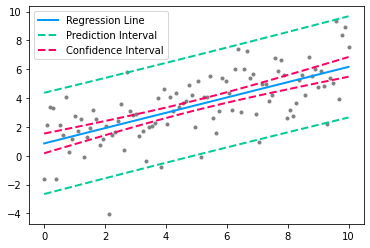

In [35]:
n = 100
x = np.linspace(0, 10, n)
e = np.random.normal(size=n)
y = 1 + 0.5*x + 2*e

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T
prstd, iv_l, iv_u = wls_prediction_std(results)

# Check we got the right things
#print(np.max(np.abs(results.fittedvalues - fittedvalues)))
#print(np.max(np.abs(iv_l - predict_ci_low)))
#print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, '.', color = 'gray')
plt.plot(x, fittedvalues, '-', lw=2, label='Regression Line', color = '#0099ff')
plt.plot(x, predict_ci_low, 'r--', lw=2, color = '#00cc99', label='Prediction Interval')
plt.plot(x, predict_ci_upp, 'r--', lw=2, color = '#00cc99')
plt.plot(x, predict_mean_ci_low, 'r--', color = '#ff0066', lw=2, label='Confidence Interval')
plt.plot(x, predict_mean_ci_upp, 'r--', color = '#ff0066', lw=2)
plt.legend();

<a name='Residuals'></a>

## **6.5. Residuals:**

<a name='Regression_Diagnostic'></a>

### **6.5.1. Regression Diagnostic:**

In [36]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
Y = df['Stock_Index_Price']
X = df[['Interest_Rate','Unemployment_Rate']]

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

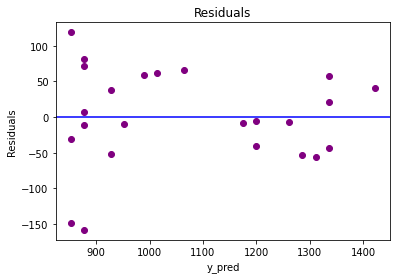

In [37]:
y_pred = results.fittedvalues
y_true = df['Stock_Index_Price']
residuals = y_true - y_pred

plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.axhline(y = 0, color = 'b', linestyle = '-')
plt.scatter(y_pred, residuals, color ='purple');

In [38]:
influence = results.get_influence()
cooks = influence.cooks_distance
cooks

(array([4.80372735e-02, 4.01480761e-02, 5.11038225e-03, 2.29357894e-02,
        2.75007545e-02, 1.30455682e-03, 3.27759686e-02, 1.94513787e-04,
        1.27947334e-02, 2.61500396e-04, 3.52124723e-02, 1.52340256e-02,
        3.39697129e-02, 1.94485559e-02, 2.78612047e-03, 4.36759843e-02,
        1.71660802e-01, 3.44875283e-02, 3.08921004e-04, 8.40042743e-04,
        3.57944955e-02, 1.10842254e-02, 2.67059508e-01, 1.67461457e-01]),
 array([0.98565839, 0.98895399, 0.99948008, 0.99514604, 0.99365666,
        0.99993268, 0.99179083, 0.99999612, 0.99795648, 0.99999395,
        0.99088129, 0.99735169, 0.99134881, 0.99619632, 0.99979021,
        0.98751133, 0.91433766, 0.99115491, 0.99999223, 0.9999652 ,
        0.99065981, 0.99834937, 0.84837289, 0.91712206]))

Cook’s distance for observation #1: 4.80372735e-02 (p-value: 0.98565839)

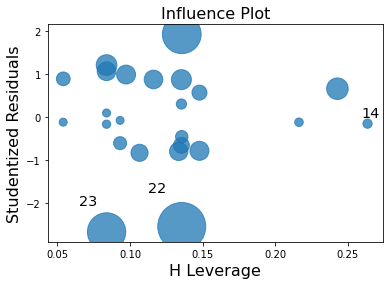

In [39]:
sm.graphics.influence_plot(results, criterion='cooks');

<a name='Multicolinearity'></a>

### **6.5.2. Multicolinearity:**

This happens when two or more columns of $X$ are close to
being linearly dependent.

**Signs:**
1. Very high standard errors for regression coefficients
2. The overall model is significant, but none of the coefficients are
3. Large changes in coefficients when adding predictors
4. Coefficients on different samples are wildly different
5. High Variance Inflation Factor (VIF) and Low Tolerance

**How To Solve:**
1. Remove highly correlated predictors from the model. 
2. Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.

#### **6.5.2.1. Correlations:**

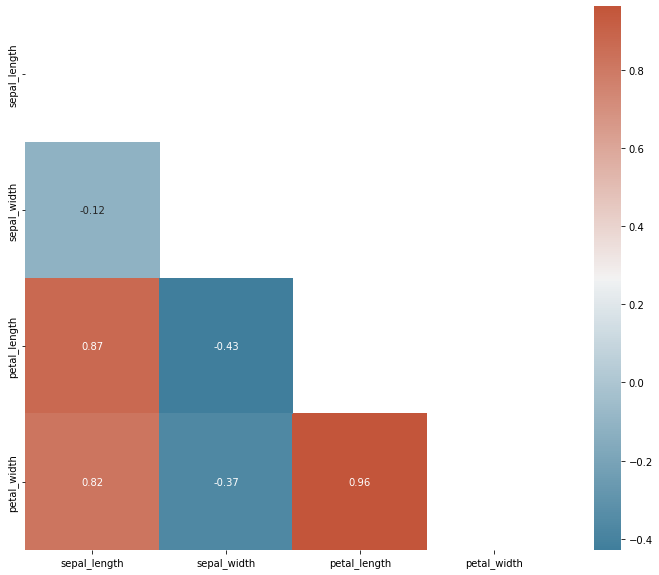

In [40]:
df = sns.load_dataset('iris')

corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

As shown above, for example, petal length and petal width have a very high correlation and one of them can be removed.

#### **6.5.2.2. Variance Inflation Factors (VIF):**

A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model. In general, a VIF above 10 indicates high correlation and is cause for concern. 

In [41]:
df = sns.load_dataset('iris')

variables = df.iloc[:,:-1]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,262.969348,sepal_length
1,96.353292,sepal_width
2,172.960962,petal_length
3,55.502060,petal_width
